In [3]:
import dask.dataframe as dd

In [43]:
df = dd.read_csv("data.csv", assume_missing=True)

In [65]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1,False,238.0,239.0,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1,False,239.0,238.0,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1,False,238.0,238.0,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1,False,238.0,151.0,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1,False,193.0,193.0,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
print(df.dtypes)

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
PULocationID                     float64
DOLocationID                     float64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
dtype: object


In [46]:
print("Row count:", df.shape[0].compute())

Row count: 6405008


In [56]:
import dask.dataframe as dd

df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')


In [47]:
df['store_and_fwd_flag'].value_counts().compute()

store_and_fwd_flag
N    6271447
Y      68120
Name: count, dtype: int64[pyarrow]

In [50]:
df['trip_distance'].value_counts().compute()

trip_distance
-26.76        1
-25.74        2
-25.69        1
-25.57        1
-23.38        1
             ..
 86.00        1
 91.41        2
 91.47        1
 94.10        1
 210240.07    1
Name: count, Length: 5606, dtype: int64

In [51]:
df['trip_distance'] = df['trip_distance'].abs()

In [52]:
max_distance = df['trip_distance'].max().compute()
df = df[df['trip_distance'] != max_distance]

In [53]:
df['VendorID'] = df['VendorID'].fillna(-1).astype('int64')
df['RatecodeID'] = df['RatecodeID'].fillna(-1).astype('int64')
df['payment_type'] = df['payment_type'].fillna(-1).astype('int64')
df['passenger_count'] = df['passenger_count'].fillna(-1).astype('int64')

In [63]:
df.isnull().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [64]:
print(df.dtypes)

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag                 bool
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object


In [66]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': False, 'Y': True}, meta=('store_and_fwd_flag', 'bool'))
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(False)

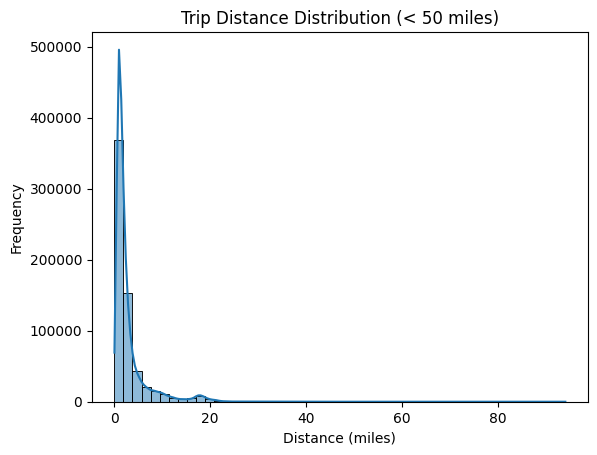

In [68]:
filtered_df = df[df['trip_distance'] < 100]  # remove huge outliers
trip_sample = filtered_df['trip_distance'].sample(frac=0.1).compute()  # sampling for performance

sns.histplot(trip_sample, bins=50, kde=True)
plt.title("Trip Distance Distribution (< 50 miles)")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()


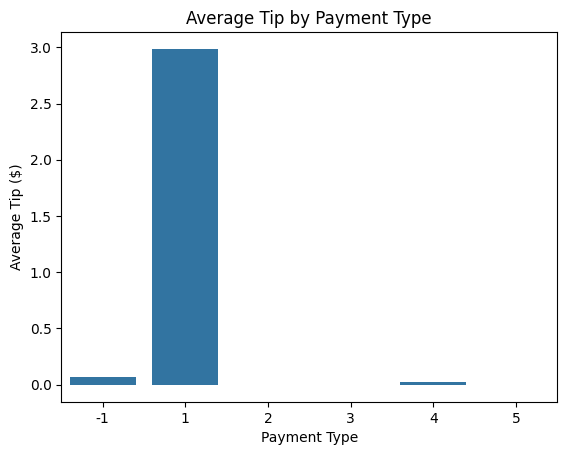

In [69]:
tip_by_payment = df.groupby('payment_type')['tip_amount'].mean().compute()

sns.barplot(x=tip_by_payment.index, y=tip_by_payment.values)
plt.title("Average Tip by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Average Tip ($)")
plt.show()
